In [11]:
import numpy as np
import pywt


In [12]:
# Load ECG signal data, skipping the header row
ecg_signal = np.loadtxt('00001_NORM.csv', delimiter=',', skiprows=1)



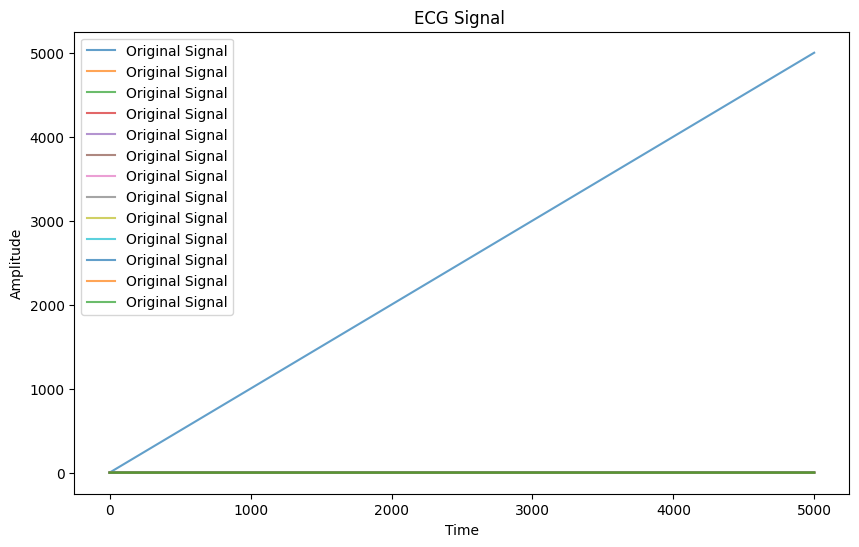

In [13]:
import matplotlib.pyplot as plt

# Plot original, noisy, and denoised signals
plt.figure(figsize=(10, 6))
plt.plot(ecg_signal, label='Original Signal', alpha=0.7)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal ')
plt.subplot
plt.show()

In [3]:
# Choose wavelet and decomposition level
wavelet = 'db4'  # Daubechies 4 wavelet
level = 4  # Decomposition level

# Perform wavelet decomposition
coeffs = pywt.wavedec(ecg_signal, wavelet, level=level)


c:\Program Files\Python312\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [4]:
# Set threshold value (adjust as needed)
threshold = 0.1 * np.sqrt(2 * np.log(len(ecg_signal)))

# Apply soft thresholding to coefficients
denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]


In [5]:
# Reconstruct denoised signal
denoised_signal = pywt.waverec(denoised_coeffs, wavelet)


In [6]:
import numpy as np

# Assume ecg_signal and denoised_signal have been properly loaded and processed

# Check the shapes of the arrays
print("ECG Signal Shape:", ecg_signal.shape)
print("Denoised Signal Shape:", denoised_signal.shape)


ECG Signal Shape: (5000, 13)
Denoised Signal Shape: (5000, 14)


In [7]:
denoised_signal = denoised_signal[:, :13]  # Trim to match the shape of ecg_signal


In [8]:
# Compute SNR
snr = 10 * np.log10(np.sum(ecg_signal ** 2) / np.sum((ecg_signal - denoised_signal) ** 2))

# Compute MSE
mse = np.mean((ecg_signal - denoised_signal) ** 2)


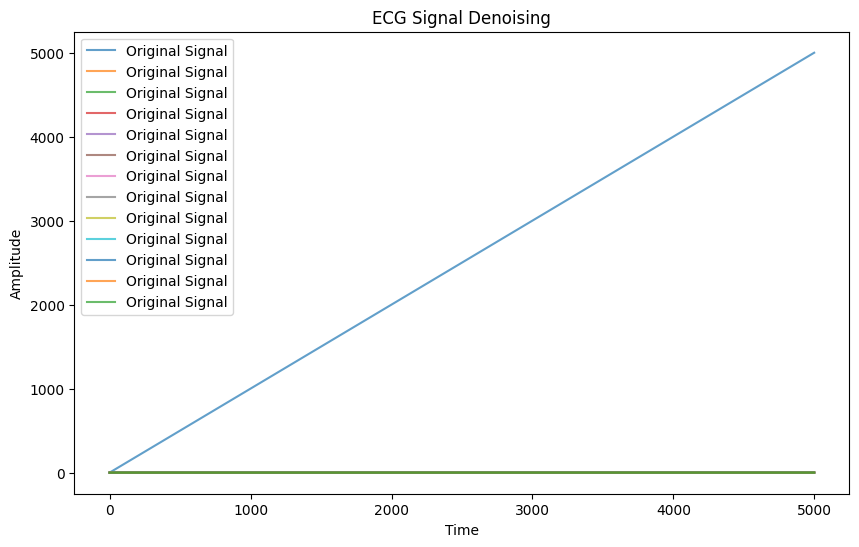

In [9]:
import matplotlib.pyplot as plt

# Plot original, noisy, and denoised signals
plt.figure(figsize=(10, 6))
plt.plot(ecg_signal, label='Original Signal', alpha=0.7)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal Denoising')
plt.subplot
plt.show()


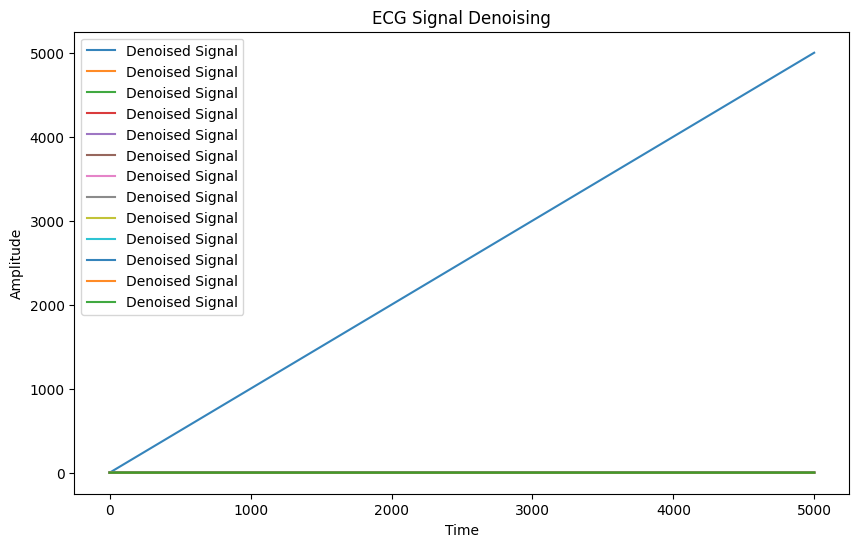

In [10]:
import matplotlib.pyplot as plt

# Plot original, noisy, and denoised signals
plt.figure(figsize=(10, 6))
plt.plot(denoised_signal, label='Denoised Signal', alpha=0.9)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal Denoising')
plt.subplot
plt.show()